In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavlofesenko/titanic-extended")

print("Path to dataset files:", path)

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/apple/.cache/kagglehub/datasets/pavlofesenko/titanic-extended/versions/2


In [2]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt


In [3]:
path = "./dataset/full.csv"
data = pd.read_csv(path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [5]:
pd.isnull(data).sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

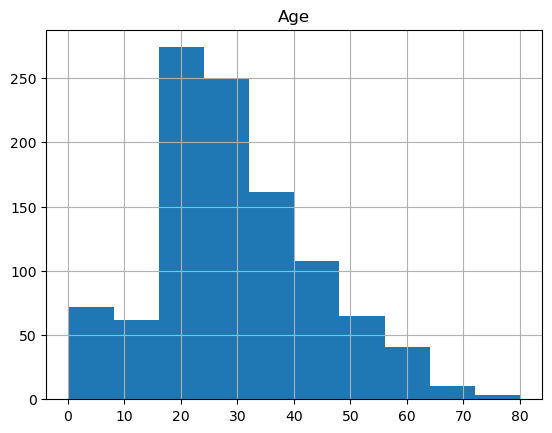

In [7]:
age = pd.DataFrame(data['Age'])
age.hist()

array([[<Axes: title={'center': 'Age_wiki'}>]], dtype=object)

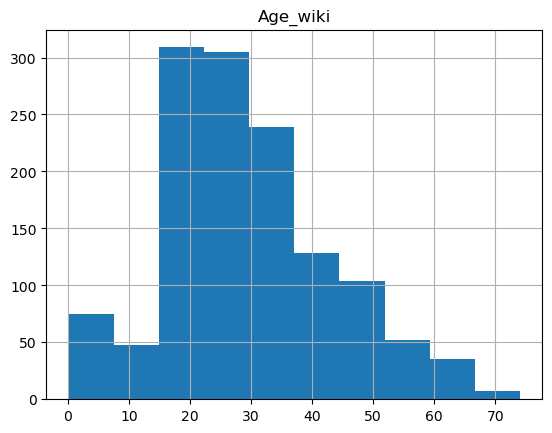

In [8]:
age_wiki = pd.DataFrame(data['Age_wiki'])
age_wiki.hist()

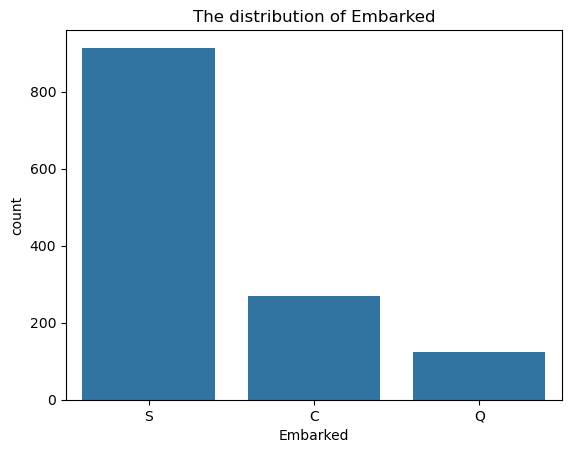

In [9]:
embark = pd.DataFrame(data['Embarked'])
seaborn.countplot(data = embark, x = 'Embarked')
plt.title("The distribution of Embarked")
plt.show()

<Axes: >

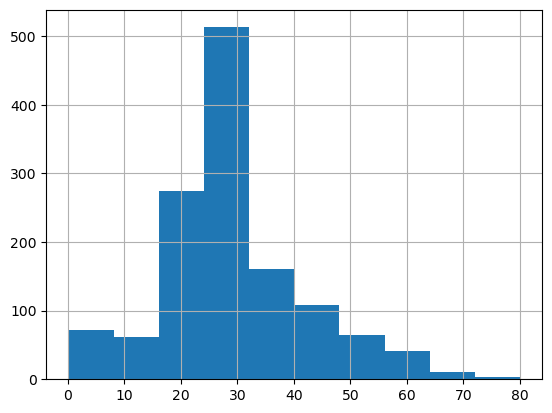

In [10]:
age_mean = data['Age'].mean(skipna=True)
data['Age'] = data['Age'].fillna(age_mean)
data['Age'].hist()


<Axes: >

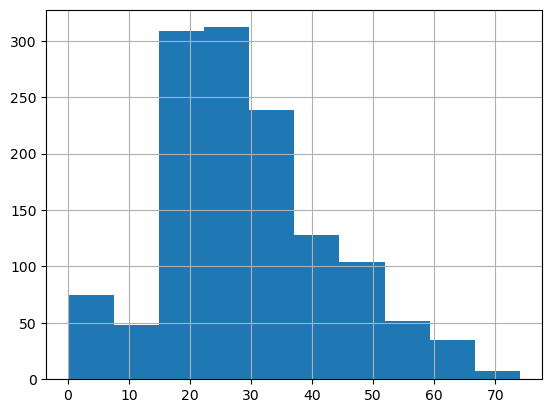

In [11]:
age_wiki_mean = data['Age_wiki'].mean(skipna=True)
data['Age_wiki'] = data['Age_wiki'].fillna(age_wiki_mean)
data['Age_wiki'].hist()

In [12]:
data.drop("Age", axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [13]:
data.rename(columns={'Age_wiki': 'Age'}, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


# Explanation
Here we choose to keep the age_wiki as the age because of there exists too much nan in the age column, and filling mean into nan will be a bad choice.


In [14]:
data['Family'] = data['SibSp'] + data['Parch']

In [15]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,0
5,6,0.0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,...,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,...,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,...,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,...,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,...,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0,1


In [16]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age               0
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
Family            0
dtype: int64

In [17]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
61,62,1.0,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,B28,...,284.0,"and maid, Miss Amelie ""Amelia"" Icard",38.0,"New York, New York, US",Southampton,"New York, New York, US",6,NaN,1.0,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,B28,...,283.0,"Stone, Mrs. Martha Evelyn (née Stevens)",62.0,"New York, New York, US",Southampton,"New York, New York, US",6,NaN,1.0,0


In [18]:
data[data['Boarded'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,16.1000,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,1
557,558,0.0,1,"Robbins, Mr. Victor",male,0,0,PC 17757,227.5250,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,0
1041,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,0,1,11767,83.1583,C54,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,1
1048,1049,NaN,3,"Lundin, Miss. Olga Elida",female,0,0,347469,7.8542,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,0
1228,1229,NaN,3,"Elias, Mr. Joseph",male,0,2,2675,7.2292,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,2


In [19]:
data['Boarded'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'Belfast', nan],
      dtype=object)

In [20]:
def replace(full):
    if pd.isna(full):
        return full 
    if full == 'Southampton':
        return 'S'
    if full == 'Cherbourg':
        return 'C'
    if full == 'Queenstown':
        return 'Q'
    if full == 'Belfast':
        return 'B'
data['Boarded'] = data['Boarded'].map(lambda x: replace(x))

In [21]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",S,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",C,"New York, New York, US",4,NaN,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",S,New York City,14?,NaN,3.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",S,"Scituate, Massachusetts, US",D,NaN,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",S,New York City,NaN,NaN,3.0,0
5,6,0.0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,...,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Q,New York City,NaN,NaN,3.0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,...,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",S,"Dorchester, Massachusetts, US",NaN,175MB,1.0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,...,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",S,"Chicago, Illinois, US",NaN,NaN,3.0,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,...,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",S,"St. Charles, Illinois, US",15,NaN,3.0,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,...,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",C,"Cleveland, Ohio, US",?,NaN,2.0,1


In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
data['Boarded'].count()

1304

In [24]:
data['Embarked_place_uncertain'] = data['Embarked'] != data['Boarded']

In [25]:
data.rename(columns={'Boarded': 'Embarked_wiki'}, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Name_wiki,Age,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",S,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",C,"New York, New York, US",4,NaN,1.0,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",S,New York City,14?,NaN,3.0,0,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",S,"Scituate, Massachusetts, US",D,NaN,1.0,1,False
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",S,New York City,NaN,NaN,3.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,...,"Spector, Mr. Woolf",23.0,"London, England",S,New York City,NaN,NaN,3.0,0,False
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,...,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",C,"New York, New York, US",8,NaN,1.0,0,False
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",S,US,NaN,32MB,3.0,0,False
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,...,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",S,New York City,NaN,NaN,3.0,0,False


# Attention
Here we should treat Embarked as real embarking place, according to my survey.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               1309 non-null   int64  
 1   Survived                  891 non-null    float64
 2   Pclass                    1309 non-null   int64  
 3   Name                      1309 non-null   object 
 4   Sex                       1309 non-null   object 
 5   SibSp                     1309 non-null   int64  
 6   Parch                     1309 non-null   int64  
 7   Ticket                    1309 non-null   object 
 8   Fare                      1308 non-null   float64
 9   Cabin                     295 non-null    object 
 10  Embarked                  1307 non-null   object 
 11  WikiId                    1304 non-null   float64
 12  Name_wiki                 1304 non-null   object 
 13  Age                       1309 non-null   float64
 14  Hometown

In [27]:
data['Country'] = data['Hometown'].map(lambda x: str(x).split(',')[-1].strip() if isinstance(x, str) else '')

In [28]:
data['Region'] = data['Country']

In [29]:
data[data['Country'] == 'Russian Empire[note 6]']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region
342,343,0.0,2,"Collander, Mr. Erik Gustaf",male,0,0,248740,13.0,NaN,...,"Helsinki, Finland, Russian Empire[note 6]",S,"Ashtabula, Ohio, US",NaN,NaN,2.0,0,False,Russian Empire[note 6],Russian Empire[note 6]
417,418,1.0,2,"Silven, Miss. Lyyli Karoliina",female,0,2,250652,13.0,NaN,...,"Tornio, Finland, Russian Empire[note 6]",S,"Minneapolis, Minnesota, US",16,NaN,2.0,2,False,Russian Empire[note 6],Russian Empire[note 6]
747,748,1.0,2,"Sinkkonen, Miss. Anna",female,0,0,250648,13.0,NaN,...,"Turku, Finland, Russian Empire[note 6]",S,"Brighton, Boston, Massachusetts, US",10,NaN,2.0,0,False,Russian Empire[note 6],Russian Empire[note 6]
1129,1130,NaN,2,"Hiltunen, Miss. Marta",female,1,1,250650,13.0,NaN,...,"Joensuu, Finland, Russian Empire[note 6]",S,"Detroit, Michigan, US",NaN,NaN,2.0,2,False,Russian Empire[note 6],Russian Empire[note 6]


In [30]:
country_region_map = {
    'Russian Empire[note 6]': {'Country': 'Russian Empire', 'Region': 'Finland'},
    'Lithuania [76]': {'Country': 'Russian Empire', 'Region': 'Lithuania'},
    'Russia (Estonia?)': {'Country': 'Russian Empire', 'Region': 'Estonia'},
    'Finland': {'Country': 'Russian Empire', 'Region': 'Finland'},

    'New York City': {'Country': 'US', 'Region': 'New York City'},

    'North Somerset England': {'Country': 'UK', 'Region': 'England'},
    'England': {'Country': 'UK', 'Region': 'England'},
    'Ireland': {'Country': 'UK', 'Region': 'Ireland'},
    'British India': {'Country': 'UK', 'Region': 'British India'},
    'Ireland[note 1]': {'Country': 'UK', 'Region': 'Ireland'},
    'South Africa': {'Country': 'UK', 'Region': 'South Africa'},
    'UK[note 1]': {'Country': 'UK', 'Region': 'Ireland'},
    'UK[note 3]': {'Country': 'UK', 'Region': 'British India'},
    'UK[note 4]': {'Country': 'UK', 'Region': 'South Africa'},
    'UK': {'Country': 'UK', 'Region': 'England'},
    'British India[note 3]': {'Country': 'UK', 'Region': 'British India'},
    'Wales': {'Country': 'UK', 'Region': 'Wales'},
    'Channel Islands': {'Country': 'UK', 'Region': 'Channel Islands'},

    'Siam[note 5]': {'Country': 'Siam', 'Region': 'Siam'},
    'German Empire[note 2]': {'Country': 'Germany', 'Region': 'Germany'},
    'Syria[81]': {'Country': 'Syria', 'Region': 'Syria'},

    'Ottoman Empire[note 7]': {'Country': 'Ottoman Empire', 'Region': 'Lebanon'},
    'Lebanon': {'Country': 'Ottoman Empire', 'Region': 'Lebanon'},
    'Turkey': {'Country': 'Ottoman Empire', 'Region': 'Turkey'}
}

In [31]:
for key, value in country_region_map.items():
    data.loc[data['Country'] == key, 'Region'] = value['Region']
    data.loc[data['Country'] == key, 'Country'] = value['Country']

In [32]:
data['Country'].unique()

array(['UK', 'US', 'Russian Empire', 'Sweden', 'Ottoman Empire',
       'Belgium', 'Canada', 'Bulgaria', 'Mexico', 'France', 'Switzerland',
       'Greece', 'China', 'Norway', 'Siam', 'Uruguay', 'Italy', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', '', 'Germany', 'Poland',
       'Slovenia', 'Unknown', 'Egypt', 'The Netherlands', 'Peru',
       'Syria or Lebanon', 'Cuba', 'Macedonia', 'Belarus', 'Austria'],
      dtype=object)

In [33]:
data['Region'].unique()

array(['England', 'US', 'Finland', 'Sweden', 'Ottoman Empire', 'Belgium',
       'Lebanon', 'Canada', 'Bulgaria', 'Mexico', 'Channel Islands',
       'France', 'Wales', 'Switzerland', 'Turkey', 'Greece', 'China',
       'Norway', 'Siam', 'Uruguay', 'Italy', 'Russian Empire', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', '', 'Germany', 'Poland',
       'New York City', 'Slovenia', 'Unknown', 'Estonia', 'Egypt',
       'The Netherlands', 'Peru', 'Lithuania', 'Syria or Lebanon', 'Cuba',
       'Macedonia', 'Belarus', 'British India', 'Austria'], dtype=object)

In [34]:
data[data['Country'] == '']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,16.1000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,True,,
557,558,0.0,1,"Robbins, Mr. Victor",male,0,0,PC 17757,227.5250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,,
1041,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,0,1,11767,83.1583,C54,...,NaN,NaN,NaN,NaN,NaN,NaN,1,True,,
1043,1044,NaN,3,"Storey, Mr. Thomas",male,0,0,3701,NaN,NaN,...,"Liverpool, Merseyside, England,",S,New York City,NaN,261MB,3.0,0,False,,
1048,1049,NaN,3,"Lundin, Miss. Olga Elida",female,0,0,347469,7.8542,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,,
1228,1229,NaN,3,"Elias, Mr. Joseph",male,0,2,2675,7.2292,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,True,,


In [35]:
data[data['Country'] == '']
data.loc[data['PassengerId'] == 1044, 'Country'] = 'UK'
data.loc[data['PassengerId'] == 1044, 'Region'] = 'England'

In [36]:
data.loc[data['Country'] == '', 'Country'] = 'Unknown'
data.loc[data['Country'] == '', 'Region'] = 'Unknown'

In [37]:
data['Country'].unique()

array(['UK', 'US', 'Russian Empire', 'Sweden', 'Ottoman Empire',
       'Belgium', 'Canada', 'Bulgaria', 'Mexico', 'France', 'Switzerland',
       'Greece', 'China', 'Norway', 'Siam', 'Uruguay', 'Italy', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', 'Unknown', 'Germany',
       'Poland', 'Slovenia', 'Egypt', 'The Netherlands', 'Peru',
       'Syria or Lebanon', 'Cuba', 'Macedonia', 'Belarus', 'Austria'],
      dtype=object)

In [38]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki', 'Age',
       'Hometown', 'Embarked_wiki', 'Destination', 'Lifeboat', 'Body', 'Class',
       'Family', 'Embarked_place_uncertain', 'Country', 'Region'],
      dtype='object')

In [39]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,"Bridgerule, Devon, England",S,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1,False,UK,England
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,"New York, New York, US",C,"New York, New York, US",4,NaN,1.0,1,False,US,US
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,"Jyväskylä, Finland",S,New York City,14?,NaN,3.0,0,False,Russian Empire,Finland
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,"Scituate, Massachusetts, US",S,"Scituate, Massachusetts, US",D,NaN,1.0,1,False,US,US
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,"Birmingham, West Midlands, England",S,New York City,NaN,NaN,3.0,0,False,UK,England
5,6,0.0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,...,"Cork, Ireland",Q,New York City,NaN,NaN,3.0,0,False,UK,England
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,...,"Dorchester, Massachusetts, US",S,"Dorchester, Massachusetts, US",NaN,175MB,1.0,0,False,US,US
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,...,"Bjuv, Skåne, Sweden",S,"Chicago, Illinois, US",NaN,NaN,3.0,4,False,Sweden,Sweden
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,...,"St. Charles, Illinois, US",S,"St. Charles, Illinois, US",15,NaN,3.0,2,False,US,US
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,...,"Zahlé, Lebanon, Ottoman Empire",C,"Cleveland, Ohio, US",?,NaN,2.0,1,False,Ottoman Empire,Ottoman Empire


In [40]:
data.isna().sum()

PassengerId                    0
Survived                     418
Pclass                         0
Name                           0
Sex                            0
SibSp                          0
Parch                          0
Ticket                         0
Fare                           1
Cabin                       1014
Embarked                       2
WikiId                         5
Name_wiki                      5
Age                            0
Hometown                       5
Embarked_wiki                  5
Destination                    5
Lifeboat                     807
Body                        1179
Class                          5
Family                         0
Embarked_place_uncertain       0
Country                        0
Region                         0
dtype: int64

In [41]:
data.loc[pd.isna(data['Body']), 'Body_Found'] = False
data.loc[pd.notna(data['Body']), 'Body_Found'] = True

In [42]:
data[['Body', 'Body_Found']]

,Body,Body_Found
0,NaN,False
1,NaN,False
2,NaN,False
3,NaN,False
4,NaN,False
...,...,...
1304,NaN,False
1305,NaN,False
1306,32MB,True
1307,NaN,False


In [43]:
data.loc[pd.isna(data['Cabin']), 'Cabin'] = 'Unknown'
data['Cabin'].unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [44]:
data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [45]:
data.loc[pd.isna(data['Fare']), ['Pclass', 'Embarked']]

,Pclass,Embarked
1043,3,S


<Axes: ylabel='Frequency'>

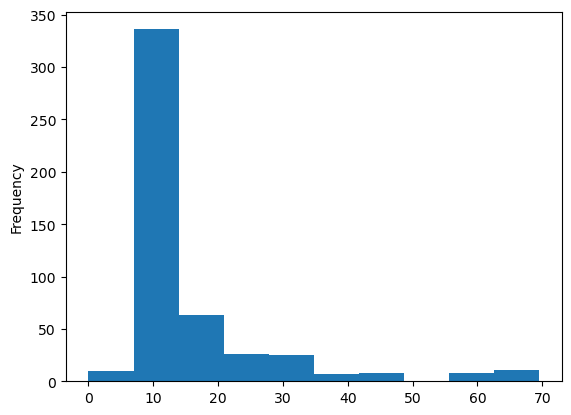

In [46]:
data.loc[(data['Pclass'] == 3) & (data['Embarked'] == 'S'), 'Fare'].describe()
data.loc[(data['Pclass'] == 3) & (data['Embarked'] == 'S'), 'Fare'].plot(kind='hist')


In [47]:
data.loc[pd.isna(data['Fare'])]
data.loc[data['PassengerId'] == 1044, 'Fare'] = 7.25 #by searching the wiki
data.loc[data['PassengerId'] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found
1043,1044,NaN,3,"Storey, Mr. Thomas",male,0,0,3701,7.25,Unknown,...,S,New York City,NaN,261MB,3.0,0,False,UK,England,True


In [48]:
data.isna().sum()

PassengerId                    0
Survived                     418
Pclass                         0
Name                           0
Sex                            0
SibSp                          0
Parch                          0
Ticket                         0
Fare                           0
Cabin                          0
Embarked                       2
WikiId                         5
Name_wiki                      5
Age                            0
Hometown                       5
Embarked_wiki                  5
Destination                    5
Lifeboat                     807
Body                        1179
Class                          5
Family                         0
Embarked_place_uncertain       0
Country                        0
Region                         0
Body_Found                     0
dtype: int64

In [49]:
data['Class'] = data['Class'].fillna(data['Pclass'])

In [50]:
data.loc[data['Class'] != data['Pclass']]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found
181,182,0.0,2,"Pernot, Mr. Rene",male,0,0,SC/PARIS 2131,15.0500,Unknown,...,C,"New York, New York, US",NaN,NaN,1.0,0,False,France,France,False
345,346,1.0,2,"Brown, Miss. Amelia ""Mildred""",female,0,0,248733,13.0000,F33,...,S,"Montreal, Quebec, Canada",11,NaN,1.0,0,False,UK,England,False
969,970,NaN,2,"Aldworth, Mr. Charles Augustus",male,0,0,248744,13.0000,Unknown,...,S,"Bryn Mawr, Pennsylvania, US",NaN,NaN,1.0,0,False,US,US,False
1000,1001,NaN,2,"Swane, Mr. George",male,0,0,248734,13.0000,F,...,S,"Montreal, Quebec, Canada",NaN,294MB,1.0,0,False,Canada,Canada,True
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,0,0,SC/PARIS 2166,13.8625,D38,...,C,"New York, New York, US",7,NaN,1.0,0,False,Germany,Germany,False


# Explaination
Alfred is transferring 2nd class to 1st class

The other one is just the servant stay in the 1st class when they are working but their accommodation is in 2nd class.


In [51]:
data.isna().sum()

PassengerId                    0
Survived                     418
Pclass                         0
Name                           0
Sex                            0
SibSp                          0
Parch                          0
Ticket                         0
Fare                           0
Cabin                          0
Embarked                       2
WikiId                         5
Name_wiki                      5
Age                            0
Hometown                       5
Embarked_wiki                  5
Destination                    5
Lifeboat                     807
Body                        1179
Class                          0
Family                         0
Embarked_place_uncertain       0
Country                        0
Region                         0
Body_Found                     0
dtype: int64

In [52]:
data['Lifeboat'].unique()

array([nan, '4', '14?', 'D', '15', '?', '13', '8', '14', 'C', '7', '6',
       '3', '16', '12', '10', '11', 'B', '5', 'A', '9', '2', '1', 'A[64]',
       '15?'], dtype=object)

In [53]:
path = './dataset/titanic3.csv'
full_suv = pd.read_csv(path)
full_suv

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [54]:
full_suv = full_suv.loc[pd.notna(full_suv['survived'])]
full_suv.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [55]:
full_suv[full_suv['name'].duplicated()]
full_suv.loc[full_suv['name'] == 'Connolly, Miss. Kate']
full_suv.loc[725, 'name'] = 'Connolly, Miss. Kate 1'
full_suv.loc[726, 'name'] = 'Connolly, Miss. Kate 2'
full_suv.loc[full_suv['name'] == 'Connolly, Miss. Kate 2']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
726,3.0,0.0,"Connolly, Miss. Kate 2",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland


In [56]:
full_suv.loc[full_suv['name'] == 'Connolly, Miss. Kate']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [57]:
data[data['Name'].duplicated()]
data.loc[data['Name'] == 'Connolly, Miss. Kate']
data.loc[289, 'Name'] = 'Connolly, Miss. Kate 1'
data.loc[897, 'Name'] = 'Connolly, Miss. Kate 2'
data.loc[data['Name'] == 'Connolly, Miss. Kate 1']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found
289,290,1.0,3,"Connolly, Miss. Kate 1",female,0,0,370373,7.75,Unknown,...,Q,New York City,13,NaN,3.0,0,False,UK,England,False


In [58]:
full_suv.rename(columns={'name': 'Name'}, inplace=True)

/var/folders/j1/48mlb4q93p5gxzvs1zfh1tz80000gn/T/ipykernel_34841/3061009504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_suv.rename(columns={'name': 'Name'}, inplace=True)


In [59]:
full_suv = full_suv[['Name', 'survived']].drop_duplicates()
result = data.merge(full_suv, on='Name', how='left')
result

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,...,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1,False,UK,England,False,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,"New York, New York, US",4,NaN,1.0,1,False,US,US,False,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,...,New York City,14?,NaN,3.0,0,False,Russian Empire,Finland,False,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,"Scituate, Massachusetts, US",D,NaN,1.0,1,False,US,US,False,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,...,New York City,NaN,NaN,3.0,0,False,UK,England,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,Unknown,...,New York City,NaN,NaN,3.0,0,False,UK,England,False,0.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,...,"New York, New York, US",8,NaN,1.0,0,False,Spain,Spain,False,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,...,US,NaN,32MB,3.0,0,False,Norway,Norway,True,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,Unknown,...,New York City,NaN,NaN,3.0,0,False,UK,England,False,0.0


In [60]:
result.loc[(pd.notna(result['Survived'])) & (result['Survived'] != result['survived'])]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found,survived


In [61]:
result = result.drop('Survived',axis=1)

In [62]:
result.rename(columns={'survived':'Survived'}, inplace=True)

In [63]:
result.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found,Survived
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,...,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1,False,UK,England,False,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,...,"New York, New York, US",4,NaN,1.0,1,False,US,US,False,1.0
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,...,New York City,14?,NaN,3.0,0,False,Russian Empire,Finland,False,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,...,"Scituate, Massachusetts, US",D,NaN,1.0,1,False,US,US,False,1.0
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,...,New York City,NaN,NaN,3.0,0,False,UK,England,False,0.0


In [64]:
result.isna().sum()

PassengerId                    0
Pclass                         0
Name                           0
Sex                            0
SibSp                          0
Parch                          0
Ticket                         0
Fare                           0
Cabin                          0
Embarked                       2
WikiId                         5
Name_wiki                      5
Age                            0
Hometown                       5
Embarked_wiki                  5
Destination                    5
Lifeboat                     807
Body                        1179
Class                          0
Family                         0
Embarked_place_uncertain       0
Country                        0
Region                         0
Body_Found                     0
Survived                      22
dtype: int64

In [65]:
to_modify = result[pd.isna(result['Survived'])]

In [66]:
def strip_quotation(s):
    return s.replace("\"", "")
to_modify.loc[:, 'Name'] = to_modify['Name'].apply(strip_quotation)
to_modify

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found,Survived
910,911,3,"Assaf Khalil, Mrs. Mariana (Miriam)",female,0,0,2696,7.2250,Unknown,C,...,"Ottawa, Ontario, Canada",C,NaN,3.0,0,False,Ottoman Empire,Lebanon,False,NaN
924,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily Watson)",female,1,2,W./C. 6607,23.4500,Unknown,S,...,"New London, Connecticut, US",NaN,NaN,3.0,3,False,UK,England,False,NaN
926,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios)",male,0,0,2682,7.2292,Unknown,C,...,"Milwaukee, Wisconsin, US",NaN,58MB,3.0,0,False,Greece,Greece,True,NaN
940,941,3,"Coutts, Mrs. William (Winnie Minnie Treanor)",female,0,2,C.A. 37671,15.9000,Unknown,S,...,"Brooklyn, New York, US",2,NaN,3.0,2,False,UK,England,False,NaN
943,944,2,"Hocking, Miss. Ellen Nellie",female,2,1,29105,23.0000,Unknown,S,...,"Akron, Ohio, US",4,NaN,2.0,3,False,UK,England,False,NaN
995,996,3,"Thomas, Mrs. Alexander (Thamine Thelma)",female,1,1,2625,8.5167,Unknown,C,...,"Wilkes Barre, Pennsylvania, US",14,NaN,3.0,2,False,Ottoman Empire,Lebanon,False,NaN
999,1000,3,"Willer, Mr. Aaron (Abi Weller)",male,0,0,3410,8.7125,Unknown,S,...,"Chicago, Illinois, US",NaN,NaN,3.0,0,True,Russia,Russia,False,NaN
1035,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,0,0,17475,26.5500,Unknown,S,...,"New York, New York, US",NaN,NaN,1.0,0,False,Sweden,Sweden,False,NaN
1116,1117,3,"Moubarek, Mrs. George (Omine Amenia Alexander)",female,0,2,2661,15.2458,Unknown,C,...,"Houtzdale, Pennsylvania, US",C,NaN,3.0,2,False,Ottoman Empire,Lebanon,False,NaN
1135,1136,3,"Johnston, Master. William Arthur Willie",male,1,2,W./C. 6607,23.4500,Unknown,S,...,"New London, Connecticut, US",NaN,NaN,3.0,3,False,UK,England,False,NaN


In [67]:
full_suv.loc[:, 'Name']= full_suv['Name'].apply(strip_quotation)
full_suv.rename(columns={"survived":"Survived"}, inplace=True)
full_suv

,Name,Survived
0,"Allen, Miss. Elisabeth Walton",1.0
1,"Allison, Master. Hudson Trevor",1.0
2,"Allison, Miss. Helen Loraine",0.0
3,"Allison, Mr. Hudson Joshua Creighton",0.0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0
...,...,...
1304,"Zabour, Miss. Hileni",0.0
1305,"Zabour, Miss. Thamine",0.0
1306,"Zakarian, Mr. Mapriededer",0.0
1307,"Zakarian, Mr. Ortin",0.0


In [68]:
to_modify.drop(columns='Survived', inplace=True)
to_modify = to_modify.merge(full_suv, on=['Name'], how='left')


/var/folders/j1/48mlb4q93p5gxzvs1zfh1tz80000gn/T/ipykernel_34841/2945123904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_modify.drop(columns='Survived', inplace=True)


In [69]:
to_modify

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region,Body_Found,Survived
0,911,3,"Assaf Khalil, Mrs. Mariana (Miriam)",female,0,0,2696,7.2250,Unknown,C,...,"Ottawa, Ontario, Canada",C,NaN,3.0,0,False,Ottoman Empire,Lebanon,False,1.0
1,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily Watson)",female,1,2,W./C. 6607,23.4500,Unknown,S,...,"New London, Connecticut, US",NaN,NaN,3.0,3,False,UK,England,False,0.0
2,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios)",male,0,0,2682,7.2292,Unknown,C,...,"Milwaukee, Wisconsin, US",NaN,58MB,3.0,0,False,Greece,Greece,True,0.0
3,941,3,"Coutts, Mrs. William (Winnie Minnie Treanor)",female,0,2,C.A. 37671,15.9000,Unknown,S,...,"Brooklyn, New York, US",2,NaN,3.0,2,False,UK,England,False,1.0
4,944,2,"Hocking, Miss. Ellen Nellie",female,2,1,29105,23.0000,Unknown,S,...,"Akron, Ohio, US",4,NaN,2.0,3,False,UK,England,False,1.0
5,996,3,"Thomas, Mrs. Alexander (Thamine Thelma)",female,1,1,2625,8.5167,Unknown,C,...,"Wilkes Barre, Pennsylvania, US",14,NaN,3.0,2,False,Ottoman Empire,Lebanon,False,1.0
6,1000,3,"Willer, Mr. Aaron (Abi Weller)",male,0,0,3410,8.7125,Unknown,S,...,"Chicago, Illinois, US",NaN,NaN,3.0,0,True,Russia,Russia,False,0.0
7,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,0,0,17475,26.5500,Unknown,S,...,"New York, New York, US",NaN,NaN,1.0,0,False,Sweden,Sweden,False,0.0
8,1117,3,"Moubarek, Mrs. George (Omine Amenia Alexander)",female,0,2,2661,15.2458,Unknown,C,...,"Houtzdale, Pennsylvania, US",C,NaN,3.0,2,False,Ottoman Empire,Lebanon,False,1.0
9,1136,3,"Johnston, Master. William Arthur Willie",male,1,2,W./C. 6607,23.4500,Unknown,S,...,"New London, Connecticut, US",NaN,NaN,3.0,3,False,UK,England,False,0.0


In [70]:
for index, row in to_modify.iterrows():
    result.loc[result['PassengerId'] == row['PassengerId'], 'Survived'] = row['Survived']

In [71]:
result.isna().sum()

PassengerId                    0
Pclass                         0
Name                           0
Sex                            0
SibSp                          0
Parch                          0
Ticket                         0
Fare                           0
Cabin                          0
Embarked                       2
WikiId                         5
Name_wiki                      5
Age                            0
Hometown                       5
Embarked_wiki                  5
Destination                    5
Lifeboat                     807
Body                        1179
Class                          0
Family                         0
Embarked_place_uncertain       0
Country                        0
Region                         0
Body_Found                     0
Survived                       0
dtype: int64

In [72]:
result.to_csv('output.csv', index=False)